In [4]:
COLORLEFT = '#31A2AC'
COLORRIGHT = '#FF8D3F'
from bioinfokit.analys import stat
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.anova import AnovaRM

# Load modules and data
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#Import all needed libraries
from matplotlib.lines import Line2D
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from statannot import add_stat_annotation
import itertools

from datahandler import Utils
from ast import literal_eval
from glob import glob
from open_ephys.analysis import Session
import pyopenephys
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

#### Necesitas estas librerías!
### Elephant --> https://elephant.readthedocs.io/en/latest/tutorials/statistics.html
### neo --> https://neo.readthedocs.io/en/stable/install.html

from matplotlib.backends.backend_pdf import PdfPages

from pylab import *
import scipy.io as sio
import warnings
%matplotlib inline

rcParams['figure.figsize']=(12,3)  # Change the default figure size

# ... and notebook specific modules
from scipy.stats import gamma 
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.markersize'] = 7

____________
#### Plots descriptive

In [9]:
obtain_path = 'C:/Users/Tiffany/Google Drive/WORKING_MEMORY/PAPER/Figures/'
obtain_path = 'C:/Users/Tiffany/Google Drive/WORKING_MEMORY/PAPER/Panel figures/Fig. 1 Behavior//'

save_path = 'C:/Users/Tiffany/Google Drive/WORKING_MEMORY/PAPER/Panel figures/Fig. 1 Behavior\/Fig. 1 Supp. 3 Trial index/'
os.chdir(save_path)
file_name = 'global_behavior_10s'
df = pd.read_csv(obtain_path+file_name+'.csv', index_col=0)
# df = df.loc[(df['prob']=='Random')&(df['valids']==1)]

C:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\IPython\core\interactiveshell.py:3319: DtypeWarning: Columns (16,55,56,57,58,73,74,75,76,79,80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
def compute_window(data, runningwindow,option):
    """
    Computes a rolling average with a length of runningwindow samples.
    """
    performance = []
    end=False
    for i in range(len(data)):
        if data['trials'].iloc[i] <= runningwindow:
            # Store the first index of that session
            if end == False:
                start=i
                end=True
            performance.append(round(np.mean(data[option].iloc[start:i + 1]), 2))
        else:
            end=False
            performance.append(round(np.mean(data[option].iloc[i - runningwindow:i]), 2))
    return performance

In [11]:
# Animals with overall not enough trials
df = (df[(df['subject'] != 'N01')&(df['subject'] != 'N15')&(df['subject'] != 'N12')&(df['subject'] != 'C26')
        &(df['subject'] != 'N23')&(df['subject'] != 'C40')])

# Animals with not enoough trials for 0,1,3,10 configuration. Only remove if that analysis if being done
df = (df.loc[(df.subject !='C39')&(df.subject !='C34')&(df.subject !='C32')&(df.subject !='C22')&(df.subject !='N22')&(df.subject !='C28')
             &(df.subject !='E06')&(df.subject !='E04')&(df.subject !='C18')])

In [12]:
def trials(row):
    val = 0
    val = np.around(row['trials']/row['total_trials'],2)
    return val

df['T'] = df.apply(trials, axis=1)
# df = df.loc[df.AWhistory == False]

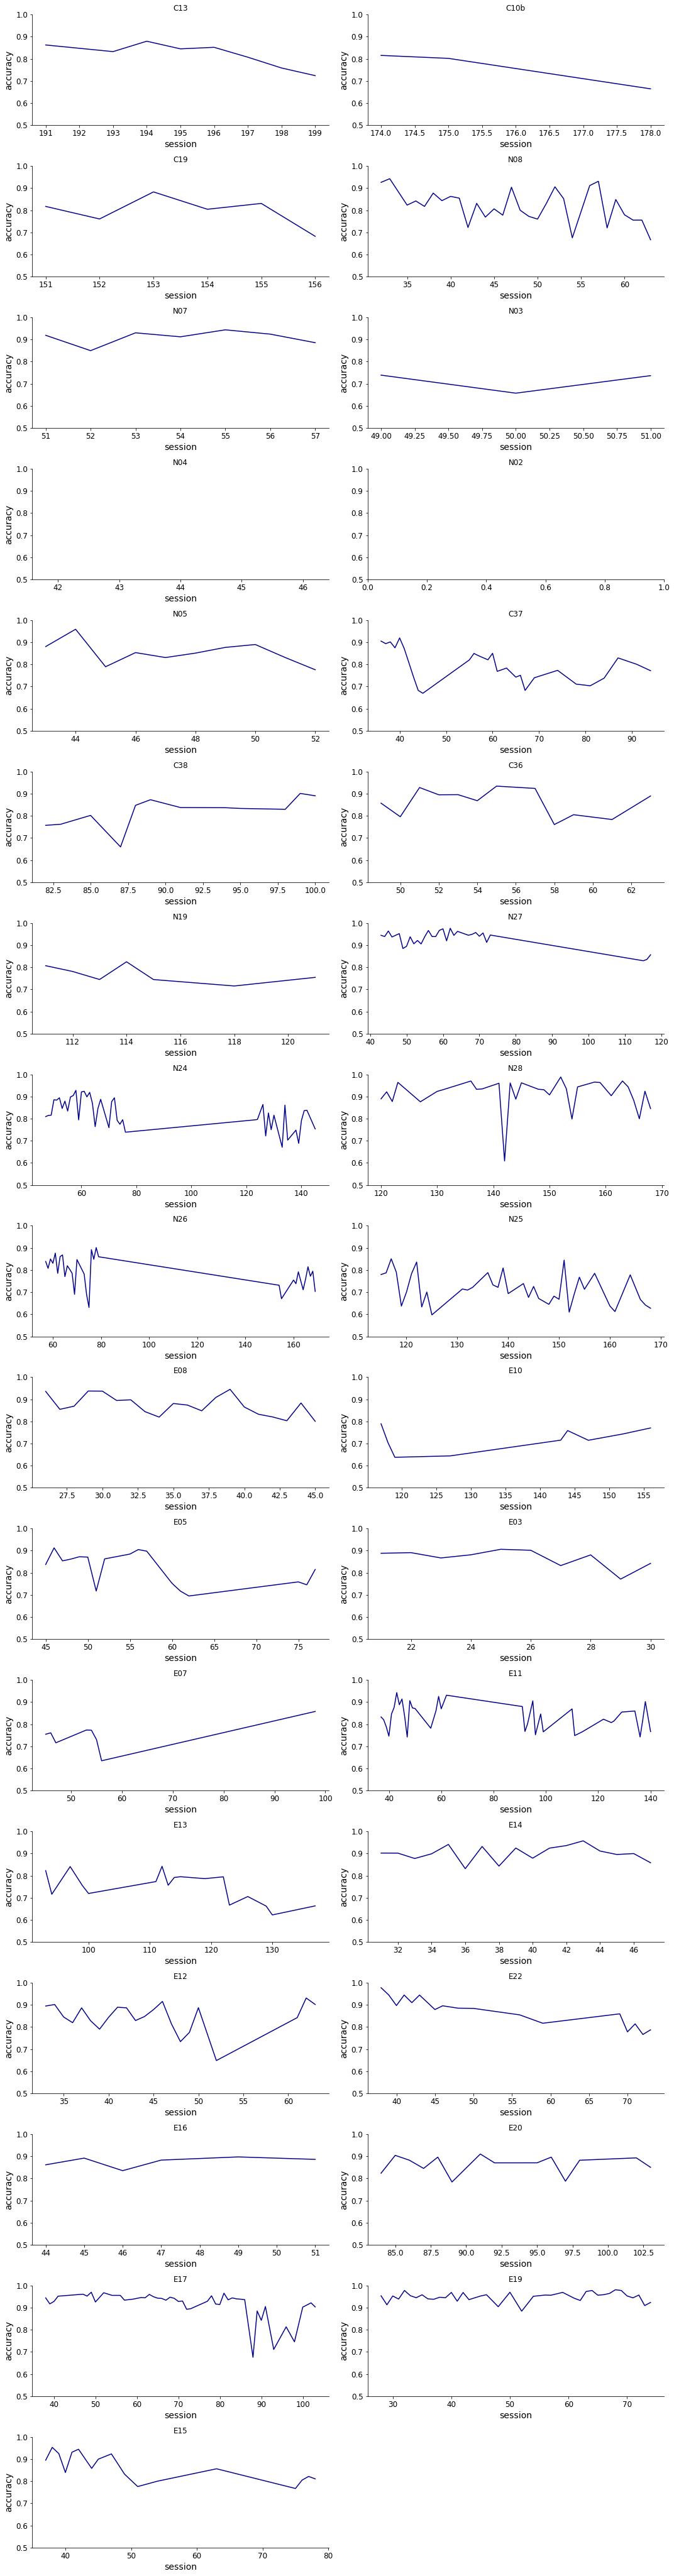

In [13]:
fig = plt.subplots(figsize=(15, 100))
df_results = pd.DataFrame()
df_results['accuracy'] = df.groupby(['subject','session'])['hit'].mean()
df_results.reset_index(inplace=True)
index = 0
for subject in df.subject.unique():
    ax = plt.subplot(30,2,index+1)
    index+=1
    maxsession = df_results.groupby('subject').session.max()[subject]-5
    sns.lineplot(x='session',y='accuracy', data=df_results[(df_results.subject ==subject)&(df_results.session <=maxsession)],ci=67, color='darkblue')
#     sns.regplot(x='session',y='accuracy', data=df_results[(df_results.subject ==subject)&(df_results.session <=maxsession)],ci=0, color='darkblue')
    plt.title(subject)
    plt.ylim(0.5,1)
    sns.despine()
plt.tight_layout()
plt.savefig(save_path+'/Accuracy session per subject.png', bbox_inches='tight')   

In [14]:
df = df.loc[(df['valids']==True)&((df['AWhistory']==False))]
animal = 'N24'

In [15]:
df['running_accuracy'] = compute_window(df, 20,'hit')
df['running_repeat'] = compute_window(df, 20,'repeat_choice')
# df = df.loc[(df['valids']==True)&(df.prob == 'Random')]

140
146
129
125
53
128


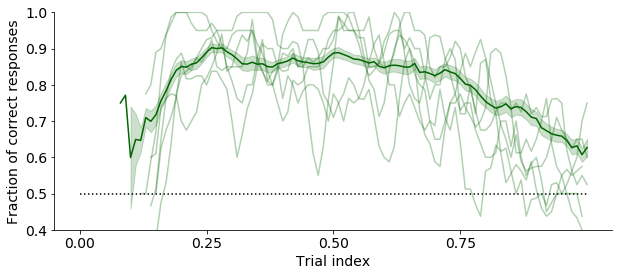

In [16]:
plt.figure(figsize=(10,4))
import random
session_list = random.sample(list(df.loc[(df['subject']==animal)]['session'].unique()), 6)
for session in session_list:
    print(session)
    temp_accuracy = df.loc[(df['subject']==animal)&(df['session']==session)]
    # temp_accuracy = df.loc[(df['valids']==True) & (df['prob'] == 'Random') & (df['subject']==animal)& (df['session']==session)]
    sns.lineplot(x='T', y='running_accuracy', data=temp_accuracy, color='darkgreen',alpha=0.3,err_style=None)

df_results = pd.DataFrame()
df_results['running_accuracy'] = df.loc[(df['subject']==animal)].groupby(['T','session'])['running_accuracy'].mean()
df_results.reset_index(inplace=True)

sns.lineplot(x='T', y='running_accuracy', data=df_results, color='darkgreen', ci=67)
plt.ylim(0.4,1)
plt.hlines(xmin=0,xmax=1,y=0.5,linestyles=':')
# plt.xlim(35,385)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,1,0.25),fontsize=14)
plt.xlabel('Trial index', fontsize=14)
plt.ylabel('Fraction of correct responses', fontsize=14)
sns.despine()
plt.savefig(save_path+'/Accuracy across trials.svg', dpi =300, bbox_inches='tight')   

140
146
129
125
53
128


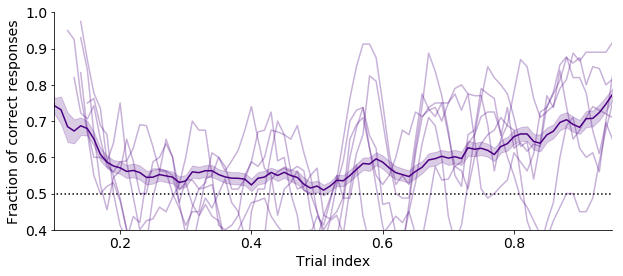

In [17]:
plt.figure(figsize=(10,4))

for session in session_list:
    print(session)
    temp_accuracy = df.loc[(df['valids']==True) &(df['subject']==animal)& (df['session']==session)]
    # temp_accuracy = df.loc[(df['valids']==True) & (df['prob'] == 'Random') & (df['subject']==animal)& (df['session']==session)]
    sns.lineplot(x='T', y='running_repeat', data=temp_accuracy, color='indigo',alpha=0.3,err_style=None)

df_results = pd.DataFrame()
df_results['running_repeat'] = df.loc[(df['valids']==True)&(df['subject']==animal)].groupby(['T','session'])['running_repeat'].mean()
df_results.reset_index(inplace=True)
sns.lineplot(x='T', y='running_repeat', data=df.loc[(df['subject']==animal)], color='indigo', ci=95)
plt.ylim(0.4,1)
plt.hlines(xmin=0,xmax=1,y=0.5,linestyles=':')
# plt.xlim(35,385)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,1,0.2),fontsize=14)
plt.xlim(0.1,0.95)
plt.xlabel('Trial index', fontsize=14)
plt.ylabel('Fraction of correct responses', fontsize=14)
sns.despine()
plt.savefig(save_path+'/Repeat across trials.svg', dpi =300, bbox_inches='tight')   

In [18]:
sns.set_context('paper')

plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.markersize'] = 7

In [20]:
# fig = plt.subplots(figsize=(50, 60))

# index = 0
# for subject in df.subject.unique():
#     ax = plt.subplot(16,4,index+1)
#     index+=1
#     sns.lineplot(x='T',y='accuracy', data=df_results[(df_results['T']>=0.1)&(df_results.subject ==subject)],ci=67, color='darkcyan')
#     sns.despine()
    
# plt.savefig(save_path+'/Normalized trials per subject.png', bbox_inches='tight')   

In [27]:
df['running_accuracy'] = compute_window(df, 20,'hit')
df['running_repeat'] = compute_window(df, 20,'repeat_choice')

In [28]:
df = df[df.valids==1]
df_results = pd.DataFrame()
df_results['accuracy'] = df.groupby(['subject','T','delay_times'])['hit'].mean()
df_results.reset_index(inplace=True)

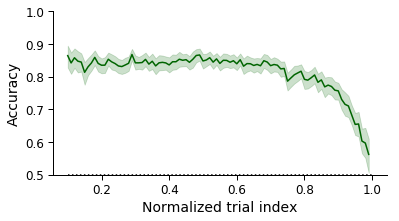

In [29]:
fig, ax = plt.subplots(1,1,  figsize=(6,3),sharey=True)

sns.lineplot(x='T',y='accuracy', data=df_results[(df_results['T'] >=0.1)&(df_results['T'] !=1)],ci=95, color='darkgreen')

ax.set_ylim(0.5,1)
# ax.set_xlim(-0.5,2.5)
ax.set_xlabel('Normalized trial index')
ax.set_ylabel('Accuracy')
ax.hlines(y=0.5,xmin=0.1,xmax=1,linestyle=':')

sns.despine()
plt.savefig(save_path+'/Normalized trial accuracy continuous.svg', dpi=300, bbox_inches='tight')  

In [22]:
df_results = df_results.loc[(df_results.delay_times!=0.5)&(df_results.delay_times!=2)&(df_results.delay_times!=5)&(df_results.delay_times!=20)&(df_results.delay_times!=1.5)&(df_results.delay_times!=0.2)&(df_results.delay_times!=0.2)]

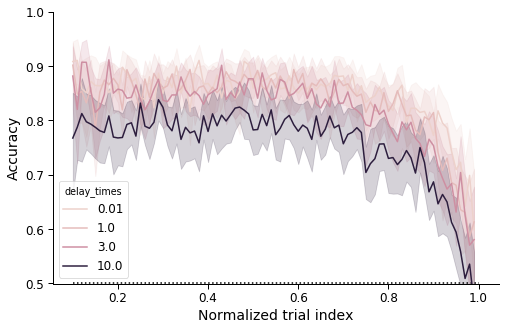

In [30]:
fig, ax = plt.subplots(1,1,  figsize=(8,5),sharey=True)

sns.lineplot(x='T',y='accuracy', hue='delay_times', data=df_results[(df_results['T'] >=0.1)&(df_results['T'] !=1)],ci=95, color='darkgreen')

ax.set_ylim(0.5,1)
# ax.set_xlim(-0.5,2.5)
ax.set_xlabel('Normalized trial index')
ax.set_ylabel('Accuracy')
ax.hlines(y=0.5,xmin=0.1,xmax=1,linestyle=':')

sns.despine()
plt.savefig(save_path+'/Normalized trial accuracy continuous.svg', dpi=300, bbox_inches='tight')  

In [ ]:
import pingouin as pg

# Compute the 2-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='accuracy', within=['T'], subject='subject', data=df)

In [56]:
df = df[df.valids==1]
grouping = ['subject','T','hit']
df_results = pd.DataFrame()
df_results['repeat_choice'] =(df.loc[(df['repeat_choice_side']==1)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 0)].groupby(grouping)['valids'].count() + df.loc[(df['repeat_choice_side']==2)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 1)].groupby(grouping)['valids'].count())/2
df_results.reset_index(inplace=True)

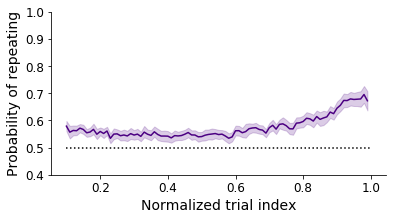

In [14]:
fig, ax = plt.subplots(1,1,  figsize=(6,3),sharey=True)
# grouping = ['subject','T','hit']
# df_results = pd.DataFrame()
# df_results['repeat_choice'] =(df.loc[(df['repeat_choice_side']==1)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 0)].groupby(grouping)['valids'].count() + df.loc[(df['repeat_choice_side']==2)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 1)].groupby(grouping)['valids'].count())/2
# df_results.reset_index(inplace=True)

# sns.lineplot(x='T',y='repeat_choice', hue='hit', data=df_results[(df_results['T'] >=0.1)&(df_results['T'] !=1)],ci=95, palette =['crimson','darkgreen'])

grouping = ['subject','T']
df_results = pd.DataFrame()
df_results['repeat_choice'] =(df.loc[(df['repeat_choice_side']==1)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 0)].groupby(grouping)['valids'].count() + df.loc[(df['repeat_choice_side']==2)].groupby(grouping)['valids'].count()/df.loc[(df.vector_answer == 1)].groupby(grouping)['valids'].count())/2
df_results.reset_index(inplace=True)

sns.lineplot(x='T',y='repeat_choice',  data=df_results[(df_results['T'] >=0.1)&(df_results['T'] !=1)],ci=95, color='indigo')

ax.set_ylim(0.4,1)
# ax.set_xlim(-0.5,2.5)
ax.set_xlabel('Normalized trial index')
ax.set_ylabel('Probability of repeating')
ax.hlines(y=0.5,xmin=0.1,xmax=1,linestyle=':')

sns.despine()
plt.savefig(save_path+'/Normalized trial repeat_choice after_correct.svg', dpi=300, bbox_inches='tight')   

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('repeat_choice ~ T', data=df_results).fit()
sm.stats.anova_lm(model, typ=3)

In [59]:
# Compute the 2-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='repeat_choice', within=['T'], subject='subject', data=df)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,T,100,4200,45.091543,0.0,0.517749,0.144928


In [86]:
def trials_label(row):
    val = 0
    if row['T'] <0.5:
        val = 'Early'
        return val
    elif row['T'] >=0.5:
        val = 'Late'
        return val
    else:
        val = 'Mid'
        return val
    return val

df['trial_label'] = df.apply(trials_label, axis=1) 

In [87]:
df_results = pd.DataFrame()
df_results['accuracy'] = df.groupby(['subject','trial_label'])['hit'].mean()
df_results.reset_index(inplace=True)

df_results['trial_label'] = pd.Categorical(df_results['trial_label'], categories=['Early','Late'], ordered=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: t-test paired samples with Bonferroni correction, P_val=6.920e-10 stat=7.884e+00


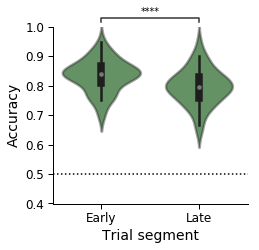

In [88]:
fig, ax = plt.subplots(1,1,  figsize=(3.5,3.25),sharey=True)

sns.violinplot(x='trial_label',y='accuracy', data=df_results, color='darkgreen',saturation=0.6,order=['Early','Late'],linewidth=0)
sns.violinplot(x='trial_label',y='accuracy', data=df_results, color='darkgreen',order=['Early','Late'],linewidth=2.5)

# sns.stripplot(x='trial_label',y='accuracy', data=df_results, color='darkcyan')
plt.setp(ax.collections, alpha=.4)

ax.set_ylim(0.4,1)
ax.set_xlim(-0.5,1.5)
ax.hlines(y=0.5,xmin=-0.5,xmax=1.5,linestyle=':')
plt.xticks([0,1],['Early','Late'])
ax.set_xlabel('Trial segment')
ax.set_ylabel('Accuracy')
sns.despine()

add_stat_annotation(ax, data=df_results, x='trial_label', y='accuracy',
                    box_pairs=[( "Early",'Late')],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)

plt.legend(handles='', ncol=2).get_frame().set_linewidth(0.0)
plt.savefig(save_path+'/Normalized trial accuracy labels.svg', dpi=300, bbox_inches='tight')   

In [89]:
stats.ttest_1samp(df_results.loc[df_results.trial_label=='Early']['accuracy'],0)

Ttest_1sampResult(statistic=101.7755681590826, pvalue=6.85107611427939e-53)

In [90]:
df_results = pd.DataFrame()
df_results['repeat_choice'] = 0.5* df.loc[(df['repeat_choice_side']==1)].groupby(['subject','trial_label'])['valids'].count()/df.loc[(df.vector_answer == 0)].groupby(['subject','trial_label'])['valids'].count() + 0.5*df.loc[(df['repeat_choice_side']==2)].groupby(['subject','trial_label'])['valids'].count()/df.loc[(df.vector_answer == 1)].groupby(['subject','trial_label'])['valids'].count()

df_results.reset_index(inplace=True)

df_results['trial_label'] = pd.Categorical(df_results['trial_label'], categories=['Early','Late'], ordered=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Early v.s. Late: t-test paired samples with Bonferroni correction, P_val=2.819e-10 stat=-8.160e+00


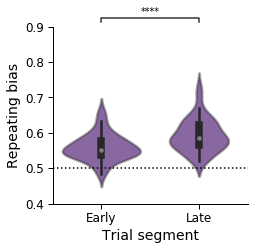

In [91]:
fig, ax = plt.subplots(1,1,  figsize=(3.5,3.25),sharey=True)

sns.violinplot(x='trial_label',y='repeat_choice', data=df_results, inner='box',color='indigo',saturation=0.6, order=['Early','Late'],linewidth=0)
sns.violinplot(x='trial_label',y='repeat_choice', data=df_results, inner='box',color='indigo', order=['Early','Late'],linewidth=2.5)

# sns.stripplot(x='trial_label',y='accuracy', data=df_results, color='darkcyan')
plt.setp(ax.collections, alpha=.4)

ax.set_ylim(0.4,0.9)
ax.set_xlim(-0.5,1.5)
ax.hlines(y=0.5,xmin=-0.5,xmax=1.5,linestyle=':')
plt.xticks([0,1],['Early','Late'])
ax.set_xlabel('Trial segment')
ax.set_ylabel('Repeating bias')
sns.despine()

add_stat_annotation(ax, data=df_results, x='trial_label', y='repeat_choice',
                    box_pairs=[( "Early",'Late')],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)

plt.legend(handles='', ncol=2).get_frame().set_linewidth(0.0)
plt.savefig(save_path+'/Normalized trial repeat_choice labels.svg', dpi=300, bbox_inches='tight')   

In [92]:
stats.ttest_1samp(df_results.loc[df_results.trial_label=='Early']['repeat_choice'],0)

Ttest_1sampResult(statistic=99.47533641981752, pvalue=1.8234856147355123e-52)

In [ ]:
fig, ax = plt.subplots(1,1,  figsize=(4,3.25),sharey=True)

xaxis = [0,1,3,10]
presented_delay = '0.01,1.0,3.0,10.0'

df_results = pd.DataFrame()
df_results['hit'] = df.loc[(df['presented_delays']==presented_delay)&(df['T']>0.45)].groupby(['subject','delay_times'])['hit'].mean()
df_results.reset_index(inplace=True)
sns.lineplot(x='delay_times',y='hit',data=df_results, palette = 'Greens', marker='o', ax=ax, legend=False)


df_results = pd.DataFrame()
df_results['hit'] = df.loc[(df['presented_delays']==presented_delay)&(df['T']<0.45)].groupby(['subject','delay_times'])['hit'].mean()
df_results.reset_index(inplace=True)
sns.lineplot(x='delay_times',y='hit',data=df_results,  palette = 'Greens', marker='o',  ax=ax, legend=False)

groupings=['subject','delay_times']
df_results = pd.DataFrame()
df_results['repeat_choice'] = 0.5* df.loc[(df['T']>=0.45)&(df['presented_delays']==presented_delay)&(df['repeat_choice_side']==1)].groupby(groupings)['valids'].count()/df.loc[(df['T']>=0.45)&(df['presented_delays']==presented_delay)&(df.vector_answer == 0)].groupby(groupings)['valids'].count() + 0.5*df.loc[(df['T']>=0.45)&(df['presented_delays']==presented_delay)&(df['repeat_choice_side']==2)].groupby(groupings)['valids'].count()/df.loc[(df['T']>=0.45)&(df['presented_delays']==presented_delay)&(df.vector_answer == 1)].groupby(groupings)['valids'].count()
# df_results['repeat_choice'] =df.loc[(df['presented_delays']==presented_delay)].groupby(groupings)['repeat_choice'].mean()
df_results.reset_index(inplace=True)

sns.lineplot(x='delay_times',y='repeat_choice',data=df_results, alpha=0.5, legend=False, marker='', palette = 'Purples', ax=ax, err_style=None)

xaxis = [0,1,3,10]
presented_delay = '0.01,1.0,3.0,10.0'
groupings=['subject','delay_times']
df_results = pd.DataFrame()
df_results['repeat_choice'] = 0.5* df.loc[(df['T']<=0.45)&(df['presented_delays']==presented_delay)&(df['repeat_choice_side']==1)].groupby(groupings)['valids'].count()/df.loc[(df['T']<=0.45)&(df['presented_delays']==presented_delay)&(df.vector_answer == 0)].groupby(groupings)['valids'].count() + 0.5*df.loc[(df['T']<=0.45)&(df['presented_delays']==presented_delay)&(df['repeat_choice_side']==2)].groupby(groupings)['valids'].count()/df.loc[(df['T']<=0.45)&(df['presented_delays']==presented_delay)&(df.vector_answer == 1)].groupby(groupings)['valids'].count()
# df_results['repeat_choice'] =df.loc[(df['presented_delays']==presented_delay)].groupby(groupings)['repeat_choice'].mean()
df_results.reset_index(inplace=True)

sns.lineplot(x='delay_times',y='repeat_choice',data=df_results, alpha=0.5, legend=False, marker='', palette = 'Purples', ax=ax, err_style=None)

ax.set_ylim(0.4,1)
ax.hlines(xmin=0, xmax=10, y=0.5, linestyles=':')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Delay duration (s)')    
sns.despine()